# **Time Series and Autocorrelation**

In [32]:
# Load packages
import matplotlib.pyplot as plt
import pandas as pd
import statsmodels.api as sm

plt.rcParams["figure.figsize"] = (16, 9)  # Figure size and width

In [33]:
# Download datasets
m4_data = pd.read_csv("/home/sscf/wqu_mscfe/Financial Econometrics/M4/M4. goog_eur_10.csv", delimiter="\t")
dxyr_data = pd.read_csv("/home/sscf/wqu_mscfe/Financial Econometrics/M4/M4. dxy_r_data.csv", delimiter="\t")
m4_data = m4_data.loc[:, ["Date", "Year", "GOOGLE", "Volume", "EURUSD", "UST10Y"]]
print(m4_data)

            Date  Year       GOOGLE   Volume    EURUSD  UST10Y
0       1/4/2016  2016   741.840027  3272800  1.085399   2.245
1       1/5/2016  2016   742.580017  1950700  1.082755   2.248
2       1/6/2016  2016   743.619995  1947000  1.075199   2.177
3       1/7/2016  2016   726.390015  2963700  1.077900   2.153
4       1/8/2016  2016   714.469971  2450900  1.092598   2.130
...          ...   ...          ...      ...       ...     ...
1500  12/23/2021  2021  2942.850098   690900  1.132888   1.493
1501  12/27/2021  2021  2961.280029   662800  1.132426   1.481
1502  12/28/2021  2021  2928.959961   931200  1.133003   1.481
1503  12/29/2021  2021  2930.090088   851100  1.131478   1.543
1504  12/30/2021  2021  2920.050049   648900  1.136015   1.515

[1505 rows x 6 columns]


In [34]:
# Convert date variable to date format
m4_data["Date2"] = pd.to_datetime(m4_data["Date"], format="%m/%d/%Y")
dxyr_data["Date2"] = pd.to_datetime(dxyr_data["Date"], format="%m/%d/%Y")

# Selecting columns and setting index
goog = m4_data.loc[:, ["Date2", "GOOGLE"]].set_index("Date2")
ust10 = m4_data.loc[:, ["Date2", "UST10Y"]].set_index("Date2")
dxy = dxyr_data[["Date2", "DXY_R"]].set_index("Date2")

print(goog.head())
print(ust10.head())
print(dxy.head())

                GOOGLE
Date2                 
2016-01-04  741.840027
2016-01-05  742.580017
2016-01-06  743.619995
2016-01-07  726.390015
2016-01-08  714.469971
            UST10Y
Date2             
2016-01-04   2.245
2016-01-05   2.248
2016-01-06   2.177
2016-01-07   2.153
2016-01-08   2.130
               DXY_R
Date2               
2016-01-05  0.005361
2016-01-06 -0.002213
2016-01-07 -0.009679
2016-01-08  0.003258
2016-01-11  0.001928


**Figure 2: Google Stock Price Daily Close Time Series Daily Chart**

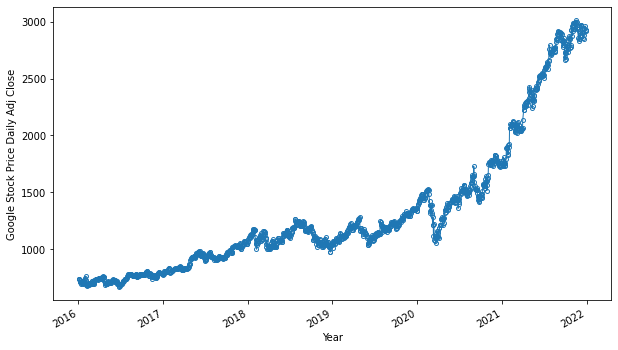

In [36]:
# Plot Google price time series chart
goog["GOOGLE"].plot(
    marker="o",
    markersize=4,
    markerfacecolor="none",
    linestyle="-",
    linewidth=1,
    xlabel="Year",
    ylabel="Google Stock Price Daily Adj Close",
    figsize=(10, 6)
)
plt.show()

**Figure 3: U.S. 10-Year Treasury Bond Yield Time Series Daily Chart**

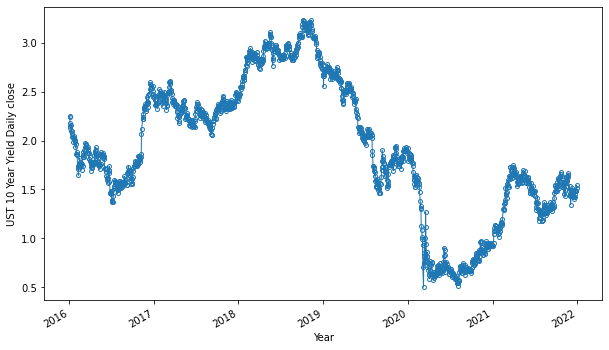

In [38]:
# Plot UST10Y time series chart
ust10["UST10Y"].plot(
    marker="o",
    markersize=4,
    markerfacecolor="none",
    linestyle="-",
    linewidth=1,
    xlabel="Year",
    ylabel="UST 10 Year Yield Daily close",
    figsize=(10, 6)
)
plt.show()

In figure 3, there doesn't seem to be a clear pattern for the U.S. 10-year Treasury Bond yield. However, we can see that if the yield in one day is going down, it would keep going down the next day. It looks like the yield movement from the previous few days can predict where the yield would go today.

From the last three figures we have noticed several patterns:

> * trend <br>
> * cyclical movement (seasonality) <br>
> * volatility clusters (volatilities can be different during different time periods) <br>
> * correlation between observations <br>
> * extreme values or outliers <br>

These are some characteristics of time series data that we will address later in the course.

Since we would like to apply statistics to analyze time series data, we need to define time series data in a mathematical way. 

### **2.2 Time Series Definition**

The data series $ \{ x_1, x_2,\cdots ,x_{t-1}, x_t \}$ is called a time series if 

> a. $t$ is an ordered time stamp (date, hour, year, etc.) <br>
> b. $x_{t}$ is an observation of a random variable $X_{t}$ <br>

Let's use the following table to explain this definition.


**Figure 4: Time Series Definition Example**

| Date | Price: <br>Observed Data | Associated <br>Random Variable |
| :---: | :---:   | :---:   |
| day 1 | $$x_1$$ | $$X_1$$ |
| day 2 | $$x_2$$ | $$X_2$$ |
| day 3 | $$x_3$$ | $$X_3$$ |
| day 4 | $$x_4$$ | $$X_4$$ |
| day 5 | $$x_5$$ | $$X_5$$ |